In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset1.csv").set_index("DATE")
df.head()

,Price,Year,Month,Unemployment Rate,Cons_Materials_Price,Interest Rate,Per_Capital_GDP,Num_Households,Income,Subsidy
DATE,,,,,,,,,,
2003-01-01,128.46,2003,1,5.8,144.4,1.24,50462.000000,111278.0,10710.4,25.9300
2003-02-01,129.36,2003,2,5.9,145.2,1.26,50573.333333,121771.5,10674.0,33.5445
2003-03-01,130.15,2003,3,5.9,145.2,1.25,50684.666667,121771.5,10696.5,33.5445
2003-04-01,130.88,2003,4,6.0,145.9,1.26,50796.000000,121771.5,10752.7,33.5445
2003-05-01,131.74,2003,5,6.1,145.8,1.26,51034.666667,121771.5,10832.0,33.5445


We don't need the month and year columns for our analysis. So, let's drop these colums.

In [3]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

#### Analysis

**Let's look at the correlation among the variables.**

In [5]:
# Correlation
df.corr()

,Price,Unemployment Rate,Cons_Materials_Price,Interest Rate,Per_Capital_GDP,Num_Households,Income,Subsidy
Price,1.000000,-0.537965,0.913022,0.305354,0.911947,0.168629,0.807622,0.176942
Unemployment Rate,-0.537965,1.000000,-0.334959,-0.546885,-0.508854,-0.075423,-0.251127,-0.071071
Cons_Materials_Price,0.913022,-0.334959,1.000000,0.003079,0.923588,0.214089,0.865056,0.209219
Interest Rate,0.305354,-0.546885,0.003079,1.000000,0.084692,-0.098501,-0.121630,-0.101369
Per_Capital_GDP,0.911947,-0.508854,0.923588,0.084692,1.000000,0.248229,0.934497,0.233705
Num_Households,0.168629,-0.075423,0.214089,-0.098501,0.248229,1.000000,0.264685,0.908808
Income,0.807622,-0.251127,0.865056,-0.121630,0.934497,0.264685,1.000000,0.258895
Subsidy,0.176942,-0.071071,0.209219,-0.101369,0.233705,0.908808,0.258895,1.000000


In [6]:
# Separating the target variable and the independent variable
y = df.pop("Price")
X = df

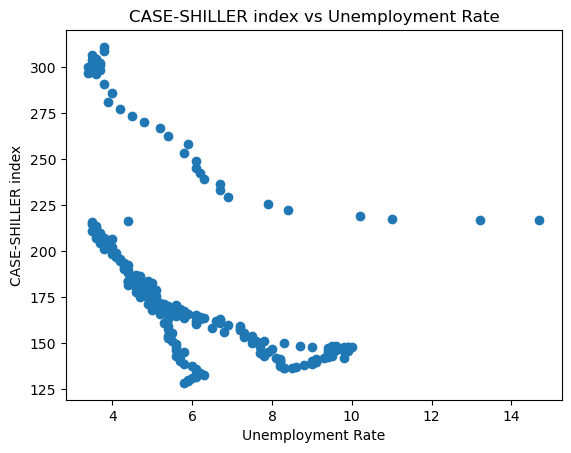

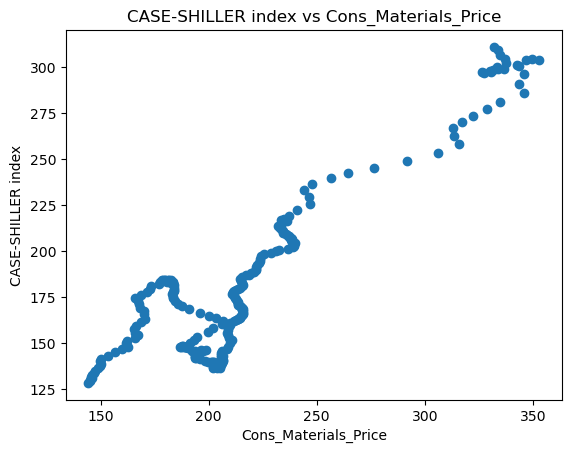

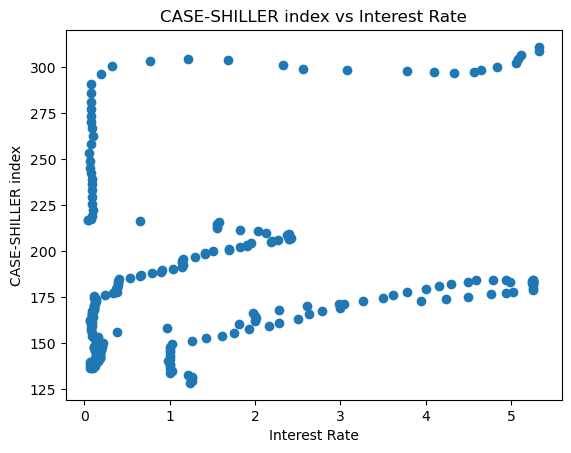

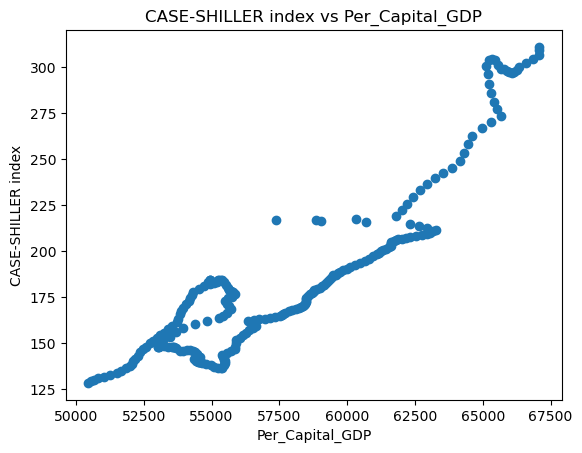

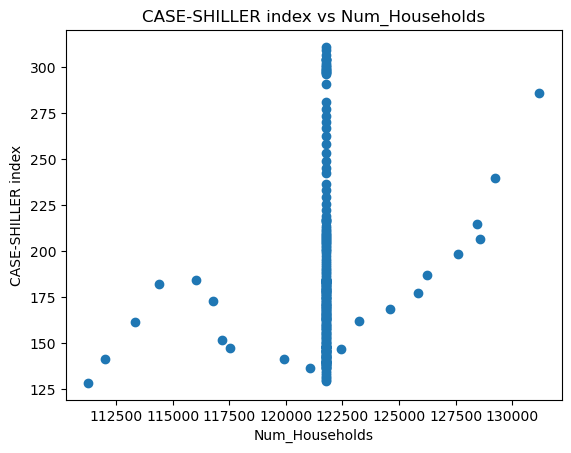

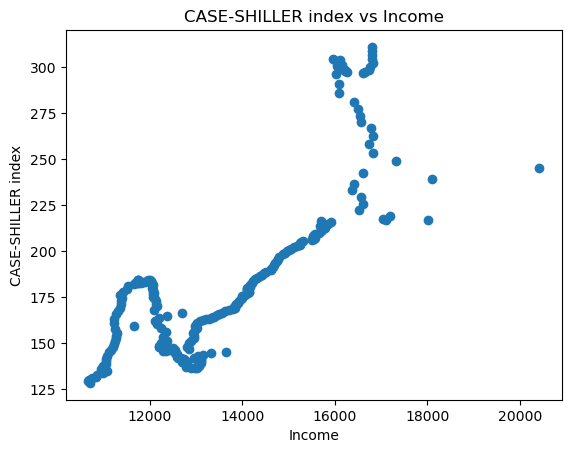

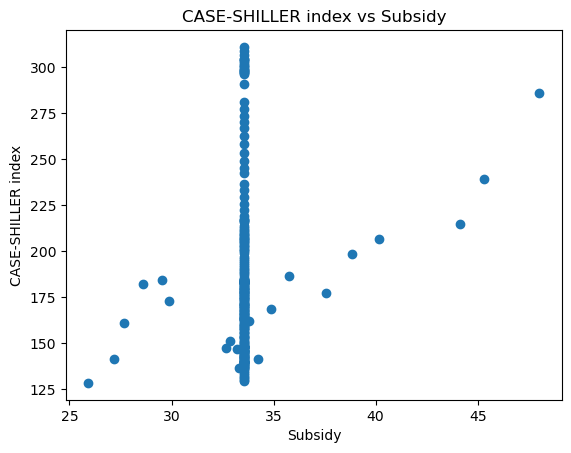

In [7]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

From the correlation matrix and the scatter plots, the following conclusions can be made -
- Unemployment rate is negatively correlated with the home prices. Which makes sense.
- Number of new houses has almost 0 correlation. This is unexpected as one would think that the number of houses supplied should also affect home prices. Maybe the number of new houses built are not enough to bring the prices down significantly.
- Interest rates have a slight negative impact on the home prices.
- All the other variables are positively correlated with the home prices.

In [10]:
# Dropping multicollinearity columns
mult_cols = ["Subsidy","Num_Households", "Cons_Materials_Price", "Income"]
df.drop(columns = mult_cols, inplace = True)
X = df

In [11]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [12]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [13]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.8485286393808744


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [15]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Unemployment Rate is 22.78981960682947
The coefficient for Interest Rate is 39.31849775550286
The coefficient for Per_Capital_GDP is 176.37914531416078


In [16]:
# The intercept
print("The intercept is: ", model.intercept_)


The intercept is:  93.91995135417807


The coefficients of the variables are not in sync with their correlation coefficients with the target variable. For example, the coefficient of "UNRATE" (unemployment rate) is positive. It does not make sense as a rise in unemployment will surely lead to a decrease in the home prices. So, the question arises, why did this happen?

As most variable increase with time. So, it is expected that they will have high correlation. So, instead of depending upon the linear model, we can directly study the impact of variables on the home price index using the scatter plots.

A few variables that could have been studied are below.
- Net-immigration (It is supposed to have a positive impact. No suitable data could be found)
- Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)
- Average house size (The data was available only for the years after 2015. Though it is expected that an increase in the average house size would increase prices, it is found that the average home size has been consistently decreasing although the prica has been increasing)
- Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)
- Tax Rate (Too many brackets (7) and could not analyse due to time)
- Number of active listings (Data prior to 2017 was not found)